### Observations:
1. All are public companies.
2. 207 are govt companies. rest are other than govt.
3. Most companies spent their CSR on Education followed by health-care.

#### First find top cities and trending sectors in those cities, Get actually data what is most lacking in that city 
#### Top sectors find  trending activities Pan india focused 
#### state specfic data, Get actually data what is most lacking in that city

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("csr_8000.xlsx")
even = [i for i in range(0,df.shape[0],2)]
df.drop(even, inplace = True)
df.reset_index(drop = True, inplace = True)
df = df.rename(columns = {'Development Sector(s)':'sector'})
df = df.rename(columns = {'CSR Project(s)':'project'})

In [10]:
df.columns

Index(['Name', 'CIN', 'Class', 'State', 'Company Type', 'RoC', 'Sub Category',
       'Listing Status', 'Year', 'Average Net Profit',
       'CSR Prescribed Expenditure', 'CSR Spent', 'Local Area Spent',
       'project', 'sector', 'State.1', 'District', 'Project Amount Outlay',
       'Amount Spent', 'Mode of Implementation'],
      dtype='object')

In [4]:
df.shape

(29590, 20)

In [18]:
selected_columns = ['Name', 'State', 'District','project','sector','Project Amount Outlay']

data = df[selected_columns]
data.head()

,Name,State,District,project,sector,Project Amount Outlay
0,Lakshmi Energy And Foods Limited,PAN India,NEC/ Not mentioned,NaN,NEC/ Not Mentioned,0.0
1,Natraj Proteins Limited,Madhya Pradesh,Hoshangabad,roof water proofing,Environmental Sustainability,500000.0
2,Natraj Proteins Limited,Madhya Pradesh,Hoshangabad,training to the poor classes of people fro emp...,Special Education,800000.0
3,Natraj Proteins Limited,Madhya Pradesh,Hoshangabad,education society,Education,500000.0
4,Natraj Proteins Limited,Madhya Pradesh,Hoshangabad,public waiting hall,Rural Development Projects,500000.0


In [19]:
data.columns = ['name','state','district','project','sector', 'project_amount_outlay']

In [20]:
education_sector = data[data.sector=='Education']

In [21]:
education_sector

,name,state,district,project,sector,project_amount_outlay
3,Natraj Proteins Limited,Madhya Pradesh,Hoshangabad,education society,Education,500000.0
7,Natraj Proteins Limited,Madhya Pradesh,NEC/ Not mentioned,Distribution of Lunch Box to students,Education,100000.0
16,Usher Agro Limited,Uttar Pradesh,NEC/ Not mentioned,NaN,Education,0.0
17,Usher Agro Limited,Uttar Pradesh,Mathura,NaN,Education,0.0
32,Krbl Limited,Haryana,NEC/ Not mentioned,Project for Sponsoring Scholarship for providi...,Education,4800000.0
33,Krbl Limited,Uttar Pradesh,NEC/ Not mentioned,Vidhya Jyoti project to promote education in t...,Education,1000000.0
34,Krbl Limited,Punjab,NEC/ Not mentioned,Project for Providing Facilities to the School...,Education,100000.0
35,Krbl Limited,Punjab,NEC/ Not mentioned,Project for Sponsoring Scholarship for providi...,Education,0.0
57,Kaveri Seed Company Ltd.,Telangana,Karimnagar,CONSTRUCTIONS OF SCHOOL AND PROVIDING FURNITURE,Education,12600000.0
63,Kaveri Seed Company Ltd.,Telangana,Karimnagar,Construction of School Building.,Education,10000000.0


In [22]:
edu_project_list = list(education_sector.project.value_counts().index.values)

In [23]:
# check nan

data.isnull().sum()

name                        0
state                       0
district                    0
project                  7929
sector                      0
project_amount_outlay       0
dtype: int64

In [24]:
data.project.value_counts()

Education                                                                                                                           993
Not Mentioned                                                                                                                       761
Health care                                                                                                                         375
Education Differently Abled Livelihood                                                                                              288
-                                                                                                                                   260
Health Eradicating Hunger Poverty And Malnutrition Safe Drinking Water  Sanitation                                                  208
Others                                                                                                                              126
Rural Development Projects                      

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

def exploder(size):
    a = [0 for i in range(size)]
    a[0] = 0.08
    return tuple(a)

def plot_pie(labels,sizes,file_name):
    # Data to plot

  
    explode = exploder(len(labels)) # explode 1st slice

    # Plot
    plt.pie(sizes, labels=labels,explode=explode,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.savefig("plot_"+file_name+".png", bbox_inches='tight')
    #plt.show()
    plt.close()

In [31]:
top_sectors = list(data.sector.value_counts().head(10).index)

In [32]:
top_sector_freq = list(data.sector.value_counts().head(10).values)

In [38]:
plot_pie(top_sectors, top_sector_freq, "top_sector")
plot_pie(top_sectors, top_sector_freq, "top_sector")

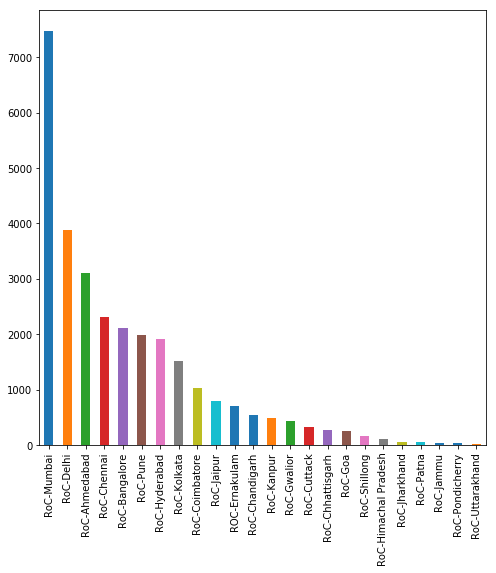

In [34]:
# first
import matplotlib.pyplot as plt
df.RoC.value_counts().plot(kind = 'bar')

#### Top 5 cities:
##### Mumbai, Delhi, Ahmedabad, Chennai, Bangalore, Pune

In [35]:
df.RoC.value_counts().head(5).index.values

array(['RoC-Mumbai', 'RoC-Delhi', 'RoC-Ahmedabad', 'RoC-Chennai',
       'RoC-Bangalore'], dtype=object)

In [36]:
top_company = df.RoC.value_counts().head(5).index.values

In [39]:
# first problem : find top CSR_Projects from Top_Sectors of top cities 

for city in top_company:
    print(city)
    top_sector = df[df.RoC == city]['sector'].value_counts().head(10)
    #print(top_sector)
    #print()
    city_data = df[df.RoC == city]
    for sec in top_sector.index:
        print(sec)
        top_projects = city_data[city_data.sector==sec]['project'].value_counts().head(5)
        #print(top_projects)
        plot_pie(list(top_projects.index), list(top_projects.values), "top_"+city.split("-")[1]+"_"+sec.split("/")[0]+"_project")
    plot_pie(list(top_sector.index), list(top_sector.values), "top_"+city.split("-")[1]+"_sector")

RoC-Mumbai
Education
Health Care
NEC/ Not Mentioned
Nec/ Not Mentioned
Rural Development Projects
Environmental Sustainability
Poverty, Eradicating Hunger, Malnutrition
Livelihood Enhancement Projects
Vocational Skills
Sanitation
RoC-Delhi
Education
NEC/ Not Mentioned
Nec/ Not Mentioned
Health Care
Rural Development Projects
Environmental Sustainability
Poverty, Eradicating Hunger, Malnutrition
Vocational Skills
Sanitation
Safe Drinking Water
RoC-Ahmedabad
Education
NEC/ Not Mentioned
Nec/ Not Mentioned
Health Care
Poverty, Eradicating Hunger, Malnutrition
Rural Development Projects
Environmental Sustainability
Livelihood Enhancement Projects
Animal Welfare
Women Empowerment
RoC-Chennai
Education
NEC/ Not Mentioned
Nec/ Not Mentioned
Health Care
Rural Development Projects
Environmental Sustainability
Poverty, Eradicating Hunger, Malnutrition
Art And Culture
Sanitation
Prime Ministers National Relief Fund
RoC-Bangalore
Education
NEC/ Not Mentioned
Nec/ Not Mentioned
Health Care
Rural De

In [37]:
## Top five CRS_Projects from Top ten sectors of each state 

top_state = data.state.unique()
for state in top_state:
    #print(state)
    print()
    top_sector = data[data.state == state]['sector'].value_counts().head(10)
    #print(top_sector)
    #print()
    state_data = data[data.state == state]
    for sec in top_sector.index:
        #print(sec)
        top_projects = state_data[state_data.sector==sec]['project'].value_counts().head(5)
        #print(top_projects)
        if top_projects.empty == False:
            plot_pie(list(top_projects.index), list(top_projects.values), "top_"+state.split("/")[0]+"_"+sec.split("/")[0]+"_project")
    if top_sector.empty == False:
        plot_pie(list(top_sector.index), list(top_sector.values), "top_"+state.split("/")[0]+"_sector")

In [49]:
df = df.rename(columns = {'CSR Project(s)':'project'})

In [54]:
pan_india = data[data.state=='PAN India']
pan_top_sector = pan_india.sector.value_counts().head(10)

plot_pie(list(pan_top_sector.index.values[2:]), list(pan_top_sector.values[2:]), "pan_india_top_sector")

In [58]:
pan_india = data[data.state=='PAN India']
pan_top_project = pan_india.project.value_counts().head(10)

plot_pie(list(pan_top_project.index.values[2:]), list(pan_top_project.values[2:]), "pan_india_top_project")